In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import pearsonr, spearmanr

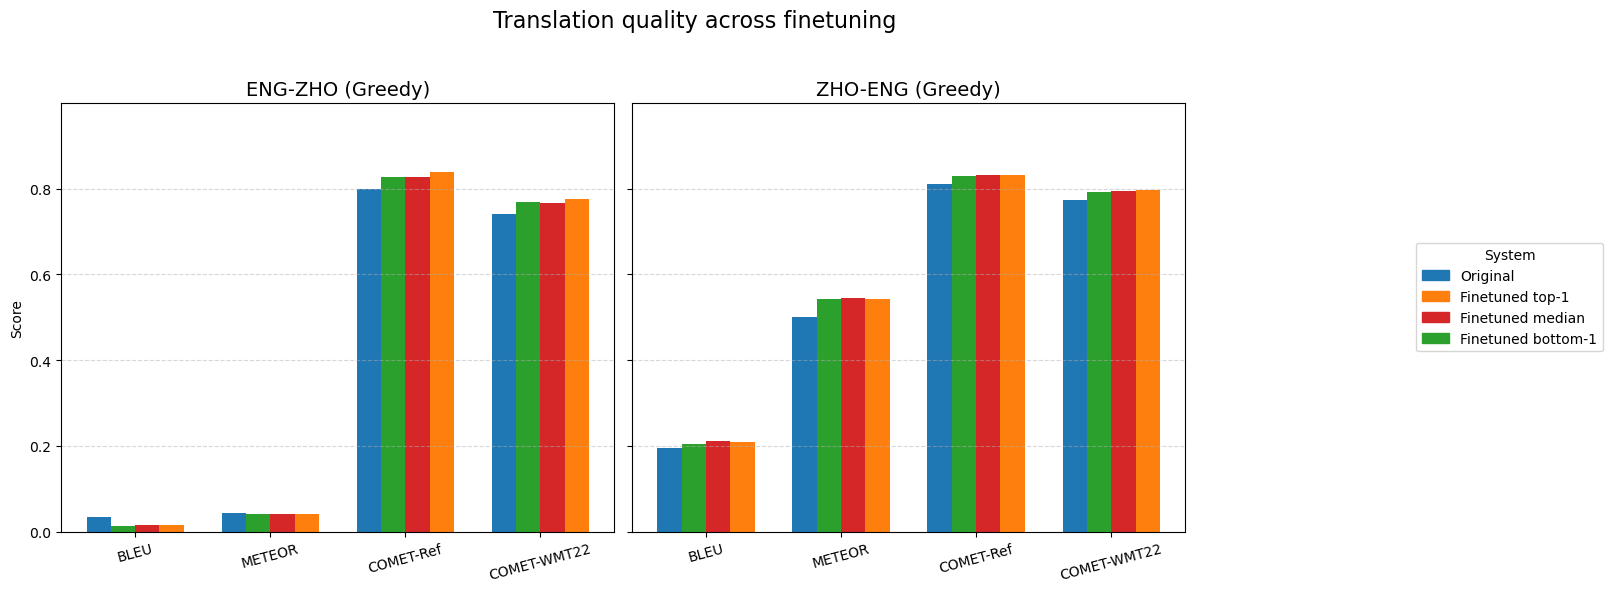

In [2]:
# Define core settings
metrics = ["bleu", "meteor", "comet_ref", "comet_wmt22"]
metric_labels = ["BLEU", "METEOR", "COMET-Ref", "COMET-WMT22"]
systems = ["Original", "Finetuned top-1", "Finetuned median", "Finetuned bottom-1"]
lang_dirs = ["eng-zho", "zho-eng"]
colors = {
    "Finetuned top-1": "#ff7f0e",
    "Finetuned median": "#d62728",
    "Finetuned bottom-1": "#2ca02c",
    "Original": "#1f77b4"
}
width = 0.18
x = np.arange(len(metrics))

# File paths, input your own paths here
original_paths = {
    "eng-zho": r"C:\Users\gerri\Documents\jaar3\thesis\exp1\csv_results_560\eng-zho_bloomz-560_flores200_results.csv",
    "zho-eng": r"C:\Users\gerri\Documents\jaar3\thesis\exp1\csv_results_560\zho-eng_bloomz-560_flores200_results.csv"
}
distilled_paths = {
    "eng-zho": r"C:\Users\gerri\Documents\jaar3\thesis\exp2\translations\csv_results\high_dist_eng-zho_bloomz-560_flores200_results.csv",
    "zho-eng": r"C:\Users\gerri\Documents\jaar3\thesis\exp2\translations\csv_results\high_dist_zho-eng_bloomz-560_flores200_results.csv"
}

average_paths = {
    "eng-zho": r"C:\Users\gerri\Documents\jaar3\thesis\exp2\translations\csv_results\avg_dist_eng-zho_bloomz-560_flores200_results.csv",
    "zho-eng": r"C:\Users\gerri\Documents\jaar3\thesis\exp2\translations\csv_results\avg_dist_zho-eng_bloomz-560_flores200_results.csv"
}
bad_paths = {
    "eng-zho": r"C:\Users\gerri\Documents\jaar3\thesis\exp2\translations\csv_results\bad_dist_eng-zho_bloomz-560_flores200_results.csv",
    "zho-eng": r"C:\Users\gerri\Documents\jaar3\thesis\exp2\translations\csv_results\bad_dist_zho-eng_bloomz-560_flores200_results.csv"
}

# Setup figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

for col_idx, langpair in enumerate(lang_dirs):
    ax = axes[col_idx]

    try:
        df_orig = pd.read_csv(original_paths[langpair])
        df_dist = pd.read_csv(distilled_paths[langpair])
        df_avg = pd.read_csv(average_paths[langpair])
        df_bad = pd.read_csv(bad_paths[langpair])
    except Exception as e:
        print(f"Error loading data for {langpair}: {e}")
        continue

    scores_orig = []
    scores_dist = []
    scores_avg = []
    scores_bad = []

    for metric in metrics:
        orig_score = df_orig[df_orig["strategy"] == "greedy"][metric].mean()
        dist_score = df_dist[df_dist["strategy"] == "greedy"][metric].mean()
        avg_score = df_avg[df_avg["strategy"] == "greedy"][metric].mean()
        bad_score = df_bad[df_bad["strategy"] == "greedy"][metric].mean()

        if metric == "bleu":
            orig_score /= 100
            dist_score /= 100
            avg_score /= 100
            bad_score /= 100

        scores_orig.append(orig_score)
        scores_dist.append(dist_score)
        scores_avg.append(avg_score)
        scores_bad.append(bad_score)

    # Plot
    ax.bar(x - 1.5 * width, scores_orig, width, label="Original", color=colors["Original"])
    ax.bar(x - 0.5 * width, scores_bad, width, label="Finetuned bottom-1", color=colors["Finetuned bottom-1"])
    ax.bar(x + 0.5 * width, scores_avg, width, label="Finetuned median", color=colors["Finetuned median"])
    ax.bar(x + 1.5 * width, scores_dist, width, label="Finetuned top-1", color=colors["Finetuned top-1"])

    ax.set_title(f"{langpair.upper()} (Greedy)", fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(metric_labels, rotation=15)
    ax.set_ylim(0, max(max(scores_orig), max(scores_dist), max(scores_avg), max(scores_bad)) * 1.2)
    ax.grid(axis="y", linestyle="--", alpha=0.5)
    if col_idx == 0:
        ax.set_ylabel("Score")

# Legend
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[s]) for s in systems]
fig.legend(handles, systems, loc='center left', bbox_to_anchor=(1.01, 0.5), title="System")

fig.suptitle("Translation quality across finetuning", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.subplots_adjust(right=0.85)
plt.show()


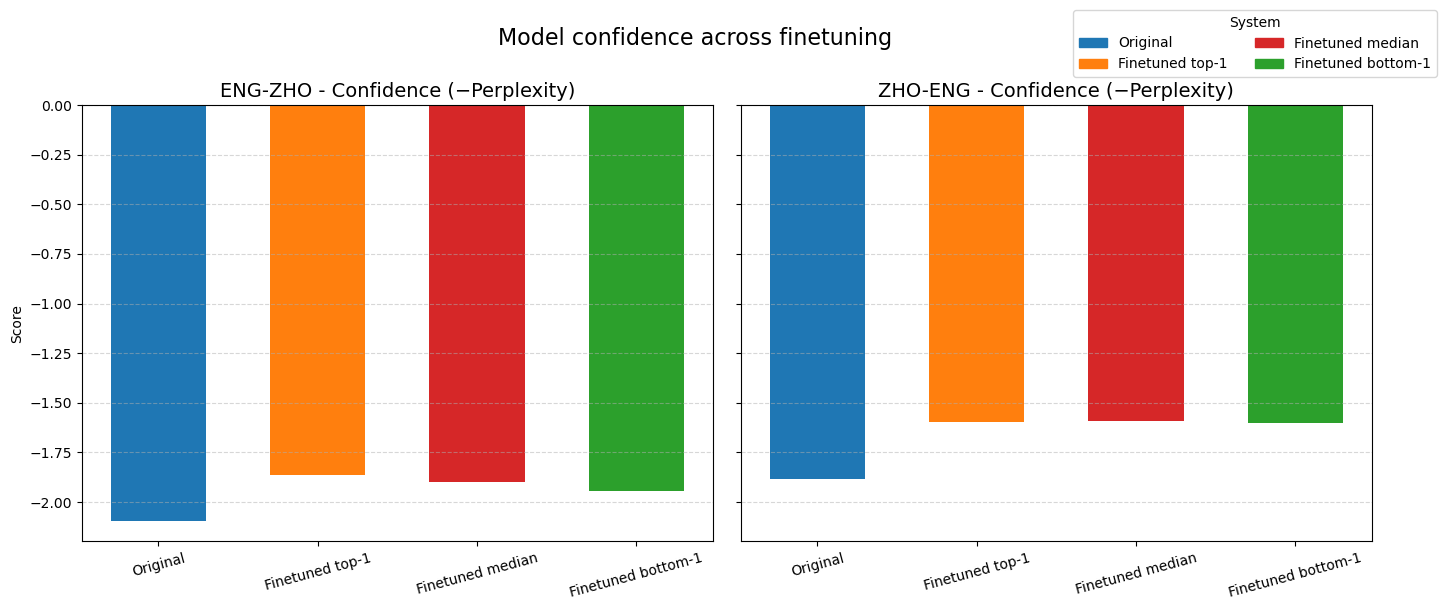

In [3]:
metric = "perplexity" 
# Setup
# Define core settings
metrics = ["bleu", "meteor", "comet_ref", "comet_wmt22", "perplexity"]
metric_labels = ["BLEU", "METEOR", "COMET-Ref", "COMET-WMT22", "Perplexity/Confidence"]
systems = ["Original", "Finetuned top-1", "Finetuned median", "Finetuned bottom-1"]
lang_dirs = ["eng-zho", "zho-eng"]
colors = {
    "Original": "#1f77b4",
    "Finetuned top-1": "#ff7f0e",
    "Finetuned median": "#d62728",
    "Finetuned bottom-1": "#2ca02c"
}
x = np.arange(len(systems))
width = 0.6

# File paths, insert your own paths here
original_paths = {
    "eng-zho": r"C:\Users\gerri\Documents\jaar3\thesis\exp1\csv_results_560\eng-zho_bloomz-560_flores200_results.csv",
    "zho-eng": r"C:\Users\gerri\Documents\jaar3\thesis\exp1\csv_results_560\zho-eng_bloomz-560_flores200_results.csv"
}
distilled_paths = {
    "eng-zho": r"C:\Users\gerri\Documents\jaar3\thesis\exp2\translations\csv_results\high_dist_eng-zho_bloomz-560_flores200_results.csv",
    "zho-eng": r"C:\Users\gerri\Documents\jaar3\thesis\exp2\translations\csv_results\high_dist_zho-eng_bloomz-560_flores200_results.csv"
}

average_paths = {
    "eng-zho": r"C:\Users\gerri\Documents\jaar3\thesis\exp2\translations\csv_results\avg_dist_eng-zho_bloomz-560_flores200_results.csv",
    "zho-eng": r"C:\Users\gerri\Documents\jaar3\thesis\exp2\translations\csv_results\avg_dist_zho-eng_bloomz-560_flores200_results.csv"
}
bad_paths = {
    "eng-zho": r"C:\Users\gerri\Documents\jaar3\thesis\exp2\translations\csv_results\bad_dist_eng-zho_bloomz-560_flores200_results.csv",
    "zho-eng": r"C:\Users\gerri\Documents\jaar3\thesis\exp2\translations\csv_results\bad_dist_zho-eng_bloomz-560_flores200_results.csv"
}

# Plotting setup
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

for col_idx, langpair in enumerate(lang_dirs):
    ax = axes[col_idx]

    try:
        df_orig = pd.read_csv(original_paths[langpair])
        df_dist = pd.read_csv(distilled_paths[langpair])
        df_avg = pd.read_csv(average_paths[langpair])
        df_bad = pd.read_csv(bad_paths[langpair])
    except Exception as e:
        print(f"Error reading files for {langpair}: {e}")
        continue

    # Extract scores
    def get_score(df):
        val = df[df["strategy"] == "greedy"][metric].mean()
        return -val if metric == "perplexity" else val

    orig_score = get_score(df_orig)
    dist_score = get_score(df_dist)
    avg_score = get_score(df_avg)
    bad_score = get_score(df_bad)

    scores = [orig_score, dist_score, avg_score, bad_score]

    # Plot
    ax.bar(x, scores, width, color=[colors[s] for s in systems])
    title_metric = "Confidence (−Perplexity)" if metric == "perplexity" else metric.upper()
    ax.set_title(f"{langpair.upper()} - {title_metric}", fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(systems, rotation=15)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    if col_idx == 0:
        ax.set_ylabel("Score")

# Legend
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[s]) for s in systems]
fig.legend(handles, systems, loc='upper center', bbox_to_anchor=(0.9, 1.02), title="System", ncol=2)

fig.suptitle("Model confidence across finetuning", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.subplots_adjust(top=0.85)
plt.show()


In [4]:
import pandas as pd
import numpy as np
import os
from scipy.stats import pearsonr, spearmanr

# Define file paths and model variants, insert your own paths here
model_variants = {
    "Finetuned with top-1": {
        "eng-zho": (r"C:\Users\gerri\Documents\jaar3\thesis\exp2\translations\csv_results", "high_dist_eng-zho_bloomz-560_flores200_results.csv"),
        "zho-eng": (r"C:\Users\gerri\Documents\jaar3\thesis\exp2\translations\csv_results", "high_dist_zho-eng_bloomz-560_flores200_results.csv")
    },
    "Finetuned with average": {
        "eng-zho": (r"C:\Users\gerri\Documents\jaar3\thesis\exp2\translations\csv_results", "avg_dist_eng-zho_bloomz-560_flores200_results.csv"),
        "zho-eng": (r"C:\Users\gerri\Documents\jaar3\thesis\exp2\translations\csv_results", "avg_dist_zho-eng_bloomz-560_flores200_results.csv")
    },
    "Finetuned with bottom-1": {
        "eng-zho": (r"C:\Users\gerri\Documents\jaar3\thesis\exp2\translations\csv_results", "bad_dist_eng-zho_bloomz-560_flores200_results.csv"),
        "zho-eng": (r"C:\Users\gerri\Documents\jaar3\thesis\exp2\translations\csv_results", "bad_dist_zho-eng_bloomz-560_flores200_results.csv")
    },
    "Standard": {
        "eng-zho": (r"C:\Users\gerri\Documents\jaar3\thesis\exp1\csv_results_560", "eng-zho_bloomz-560_flores200_results.csv"),
        "zho-eng": (r"C:\Users\gerri\Documents\jaar3\thesis\exp1\csv_results_560", "zho-eng_bloomz-560_flores200_results.csv")
    }
}

lang_pairs = ["eng-zho", "zho-eng"]
quality_metrics = ["bleu", "meteor", "comet_ref", "comet_wmt22"]

# === DATA COLLECTION ===
quality_data = []
confidence_data = []

for lp in lang_pairs:
    quality_row = {}
    confidence_row = {}
    src, tgt = lp.split("-")

    for variant, file_map in model_variants.items():
        if lp not in file_map:
            for metric in quality_metrics:
                quality_row[(variant, metric.upper())] = None
            for m in ["Confidence", "Pearson"]:
                confidence_row[(variant, m)] = None
            continue

        folder, filename = file_map[lp]
        file_path = os.path.join(folder, filename)

        if not os.path.exists(file_path):
            for metric in quality_metrics:
                quality_row[(variant, metric.upper())] = None
            for m in ["Confidence", "Pearson"]:
                confidence_row[(variant, m)] = None
            continue

        df = pd.read_csv(file_path)
        sub = df[df["strategy"] == "greedy"]

        if sub.empty:
            for metric in quality_metrics:
                quality_row[(variant, metric.upper())] = None
            for m in ["Confidence", "Pearson"]:
                confidence_row[(variant, m)] = None
            continue

        for metric in quality_metrics:
            quality_row[(variant, metric.upper())] = sub[metric].mean()

        # Confidence and correlation
        x = -sub["perplexity"]
        y = sub["comet_ref"]
        confidence_row[(variant, "Confidence")] = x.mean()

        # Clean NaNs/Infs
        xy = pd.DataFrame({"x": x, "y": y}).dropna()
        xy = xy[np.isfinite(xy["x"]) & np.isfinite(xy["y"])]
        x_clean, y_clean = xy["x"], xy["y"]

        if len(x_clean) >= 2 and x_clean.std() > 0 and y_clean.std() > 0:
            confidence_row[(variant, "Pearson")], _ = pearsonr(x_clean, y_clean)
        else:
            confidence_row[(variant, "Pearson")] = None

        if len(x_clean) >= 2 and x_clean.nunique() > 1 and y_clean.nunique() > 1:
            confidence_row[(variant, "Spearman")], _ = spearmanr(x_clean, y_clean)
        else:
            confidence_row[(variant, "Spearman")] = None

    quality_row[("Language Pair", "")] = lp
    confidence_row[("Language Pair", "")] = lp
    quality_data.append(quality_row)
    confidence_data.append(confidence_row)

# Tables
df_quality = pd.DataFrame(quality_data).set_index(("Language Pair", ""))
df_confidence = pd.DataFrame(confidence_data).set_index(("Language Pair", ""))

df_quality.columns = pd.MultiIndex.from_tuples(df_quality.columns)
df_confidence.columns = pd.MultiIndex.from_tuples(df_confidence.columns)

df_quality.loc["Average"] = df_quality.mean(numeric_only=True)
df_confidence.loc["Average"] = df_confidence.mean(numeric_only=True)

def style_table(df):
    return df.style.set_properties(**{
        'background-color': 'white',
        'color': 'black',
        'border-color': 'black'
    })

display(style_table(df_quality))
display(style_table(df_confidence))

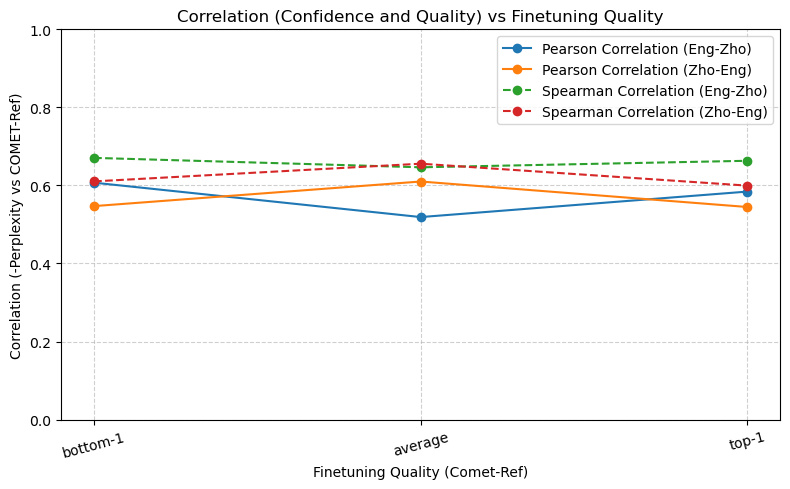

In [5]:
# Plot: Correlation vs. Finetuning Quality
variants_order = [
    "Finetuned with top-1",
    "Finetuned with average",
    "Finetuned with bottom-1"
]

pearson_scores_a = [df_confidence.loc["eng-zho"][(variant, "Pearson")] for variant in variants_order]
pearson_scores_b = [df_confidence.loc["zho-eng"][(variant, "Pearson")] for variant in variants_order]
spearman_scores_a = [df_confidence.loc["eng-zho"][(variant, "Spearman")] for variant in variants_order]
spearman_scores_b = [df_confidence.loc["zho-eng"][(variant, "Spearman")] for variant in variants_order]

# X-axis labels
labels = ["bottom-1", "average", "top-1"]
x = range(len(labels))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, pearson_scores_a, marker="o", linestyle="-", label="Pearson Correlation (Eng-Zho)")
plt.plot(x, pearson_scores_b, marker="o", linestyle="-", label="Pearson Correlation (Zho-Eng)")
plt.plot(x, spearman_scores_a, marker="o", linestyle="--", label="Spearman Correlation (Eng-Zho)")
plt.plot(x, spearman_scores_b, marker="o", linestyle="--", label="Spearman Correlation (Zho-Eng)")
plt.xticks(x, labels, rotation=15)
plt.ylabel("Correlation (-Perplexity vs COMET-Ref)")
plt.xlabel("Finetuning Quality (Comet-Ref)")
plt.title("Correlation (Confidence and Quality) vs Finetuning Quality")
plt.grid(True, linestyle="--", alpha=0.6)
plt.ylim(0, 1)
plt.tight_layout()
plt.legend()
plt.show()


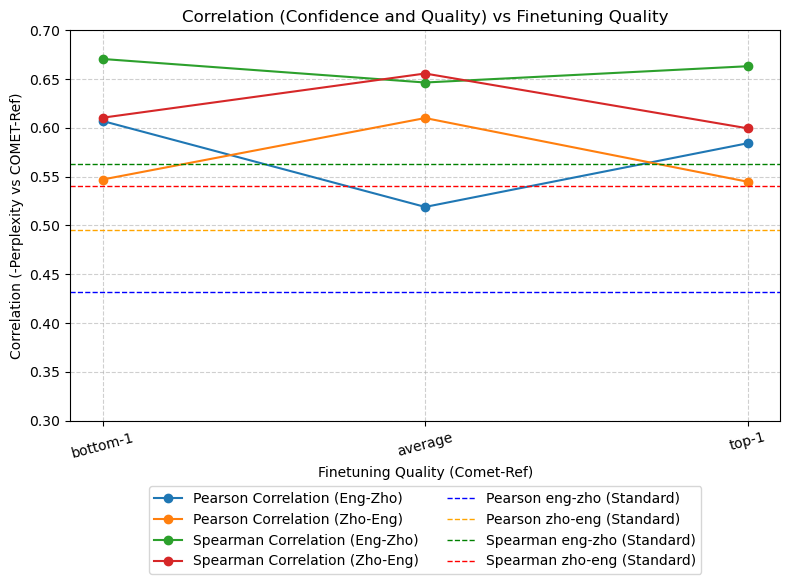

In [6]:
import matplotlib.pyplot as plt

variants_order = [
    "Finetuned with top-1",
    "Finetuned with average",
    "Finetuned with bottom-1"
]

# Extract Pearson and Spearman scores from df_confidence
pearson_scores_a = [df_confidence.loc["eng-zho"][(variant, "Pearson")] for variant in variants_order]
pearson_scores_b = [df_confidence.loc["zho-eng"][(variant, "Pearson")] for variant in variants_order]
spearman_scores_a = [df_confidence.loc["eng-zho"][(variant, "Spearman")] for variant in variants_order]
spearman_scores_b = [df_confidence.loc["zho-eng"][(variant, "Spearman")] for variant in variants_order]

pearson_standard_a = df_confidence.loc["eng-zho"][("Standard", "Pearson")]
pearson_standard_b = df_confidence.loc["zho-eng"][("Standard", "Pearson")]
spearman_standard_a = df_confidence.loc["eng-zho"][("Standard", "Spearman")]
spearman_standard_b = df_confidence.loc["zho-eng"][("Standard", "Spearman")]

# X-axis labels
labels = ["bottom-1", "average", "top-1"]
x = range(len(labels))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, pearson_scores_a, marker="o", linestyle="-", label="Pearson Correlation (Eng-Zho)")
plt.plot(x, pearson_scores_b, marker="o", linestyle="-", label="Pearson Correlation (Zho-Eng)")
plt.plot(x, spearman_scores_a, marker="o", linestyle="-", label="Spearman Correlation (Eng-Zho)")
plt.plot(x, spearman_scores_b, marker="o", linestyle="-", label="Spearman Correlation (Zho-Eng)")

plt.axhline(y=pearson_standard_a, color="blue", linestyle="--", linewidth=1, label="Pearson eng-zho (Standard)")
plt.axhline(y=pearson_standard_b, color="orange", linestyle="--", linewidth=1, label="Pearson zho-eng (Standard)")
plt.axhline(y=spearman_standard_a, color="green", linestyle="--", linewidth=1, label="Spearman eng-zho (Standard)")
plt.axhline(y=spearman_standard_b, color="red", linestyle="--", linewidth=1, label="Spearman zho-eng (Standard)")

plt.xticks(x, labels, rotation=15)
plt.ylabel("Correlation (-Perplexity vs COMET-Ref)")
plt.xlabel("Finetuning Quality (Comet-Ref)")
plt.title("Correlation (Confidence and Quality) vs Finetuning Quality")
plt.grid(True, linestyle="--", alpha=0.6)
plt.ylim(0.3, 0.7)
plt.tight_layout()
plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=True)
plt.show()



In [7]:
# Export to LaTeX file
with open("quality_metrics_table22.tex", "w") as f:
    f.write(df_quality.to_latex(multicolumn=True, multirow=True, float_format="%.3f"))

with open("confidence_correlation_table22.tex", "w") as f:
    f.write(df_confidence.to_latex(multicolumn=True, multirow=True, float_format="%.3f"))